In [1]:
import pandas as pd
df=pd.read_csv("T20k.csv")
df.head()

/tmp/ipykernel_15788/2692224860.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("T20k.csv")


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.4166667,203.5482935,...,32,203985.5,575837.2562,1629110,379,13800000,4277541.062,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.1176471,171.9194127,...,32,178326.875,503426.946,1424245,325,13800000,4229413.12,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0,0,...,0,6909777.333,11700000,20400000,6,24400000,24300000,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.8888889,409.7021615,...,20,0,0,0,0,0,0,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51,0,...,32,0,0,0,0,0,0,0,0,BENIGN


In [2]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,20498,20498,20498,20498,20498,20498,20498,20498,20498.0,20498.0,...,20498,20498.0,20498.0,20498,20498,20498.0,20498.0,20498,20498,20498
unique,2859,12582,289,289,2675,3288,1535,219,3131.0,3277.0,...,19,3654.0,2079.0,3639,3430,1814.0,2080.0,986,2400,3
top,53,3,2,2,0,0,6,0,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
freq,5937,261,5402,4810,1272,2557,1591,4154,1345.0,8780.0,...,7670,10157.0,11092.0,10157,10157,10150.0,11087.0,10150,10150,20397


In [3]:
# Strip column names
df.columns = df.columns.str.strip()

# Convert Label to 0/1 first
df["Label"] = df["Label"].astype(str).str.strip().str.upper()
df["Label"] = df["Label"].map({"BENIGN": 0, "MALIGNANT": 1})

# Convert all columns to numeric (Label included)
df = df.apply(pd.to_numeric, errors="coerce")

# Check numeric summary
print(df.describe())

       Destination Port  Flow Duration  Total Fwd Packets  \
count      20496.000000   2.049600e+04       20496.000000   
mean        7312.644989   1.448343e+07          60.186604   
std        17328.142633   3.396408e+07        3026.334354   
min            0.000000   0.000000e+00           1.000000   
25%           53.000000   1.740000e+02           2.000000   
50%           80.000000   3.092000e+04           2.000000   
75%          443.000000   9.353798e+05           4.000000   
max        63710.000000   1.199999e+08      200755.000000   

       Total Backward Packets  Total Length of Fwd Packets  \
count            20496.000000                 2.049600e+04   
mean                78.664132                 8.836392e+02   
std               4085.728665                 1.845481e+04   
min                  0.000000                 0.000000e+00   
25%                  1.000000                 4.100000e+01   
50%                  2.000000                 7.200000e+01   
75%             

In [4]:
pd.set_option('display.max_rows', 100)  # Show up to 100 rows
print(df.isna().sum())

Destination Port                 2
Flow Duration                    2
Total Fwd Packets                2
Total Backward Packets           2
Total Length of Fwd Packets      2
Total Length of Bwd Packets      2
Fwd Packet Length Max            2
Fwd Packet Length Min            2
Fwd Packet Length Mean           2
Fwd Packet Length Std            2
Bwd Packet Length Max            2
Bwd Packet Length Min            2
Bwd Packet Length Mean           2
Bwd Packet Length Std            2
Flow Bytes/s                     4
Flow Packets/s                   2
Flow IAT Mean                    2
Flow IAT Std                     2
Flow IAT Max                     2
Flow IAT Min                     2
Fwd IAT Total                    2
Fwd IAT Mean                     2
Fwd IAT Std                      2
Fwd IAT Max                      2
Fwd IAT Min                      2
Bwd IAT Total                    2
Bwd IAT Mean                     2
Bwd IAT Std                      2
Bwd IAT Max         

In [5]:
missing_label_rows = df[df['Label'].isna()]
print(missing_label_rows)

       Destination Port  Flow Duration  Total Fwd Packets  \
3287                NaN            NaN                NaN   
3291                NaN            NaN                NaN   
12637              80.0      5185118.0                7.0   
12643              80.0      5057374.0               10.0   
12700              80.0           81.0                1.0   
...                 ...            ...                ...   
20354              80.0      5863798.0                3.0   
20356              80.0      5573904.0                3.0   
20359              80.0      5310210.0                3.0   
20371              80.0      5783696.0                3.0   
20379              80.0      5392841.0                3.0   

       Total Backward Packets  Total Length of Fwd Packets  \
3287                      NaN                          NaN   
3291                      NaN                          NaN   
12637                     7.0                       1022.0   
12643              

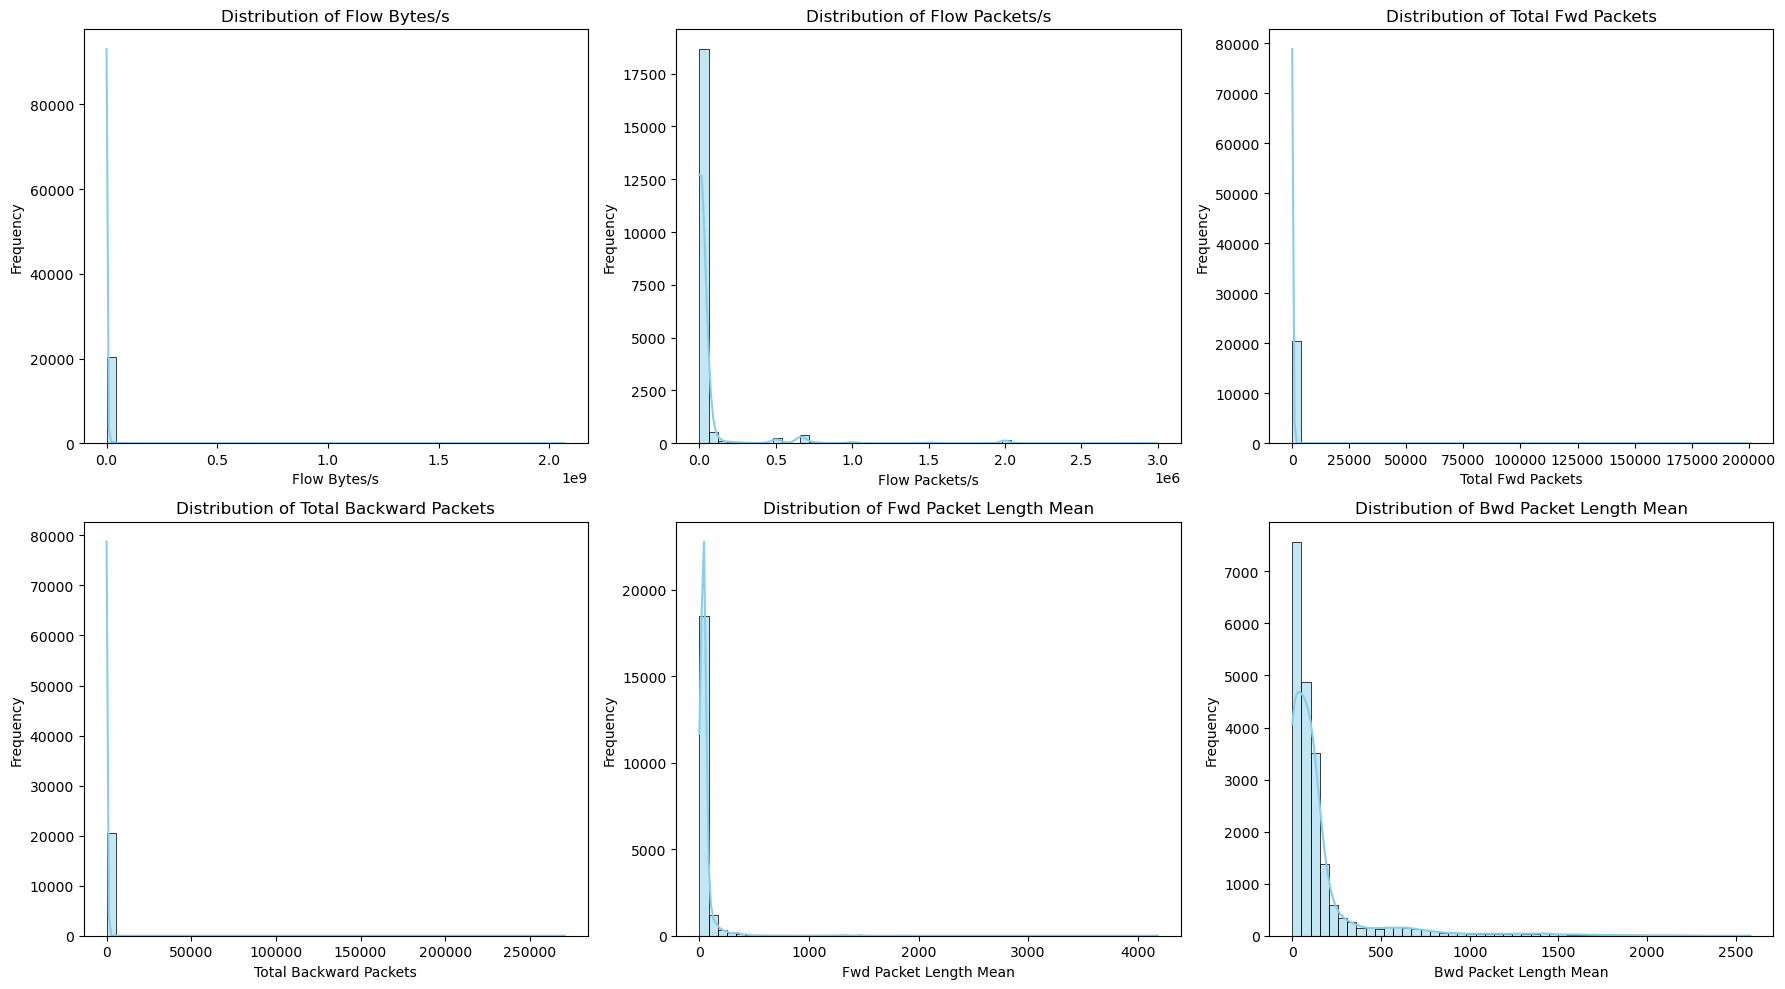

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot
columns_to_plot = [
    'Flow Bytes/s', 
    'Flow Packets/s', 
    'Total Fwd Packets', 
    'Total Backward Packets', 
    'Fwd Packet Length Mean', 
    'Bwd Packet Length Mean'
]

# Set up subplot grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # flatten to easily iterate

# Plot each column
for i, col in enumerate(columns_to_plot):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue', bins=50)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
import numpy as np

# 1. Separate features and label
features = df.drop(columns=["Label"])
label = df["Label"]

# 2. Fill missing values in feature columns based on skewness
for col in features.columns:
    if features[col].isnull().sum() > 0:  # only handle columns with NaN
        if features[col].skew() > 1:  # highly skewed → use median
            features[col] = features[col].fillna(features[col].median())
        else:  # normal distribution → use mean
            features[col] = features[col].fillna(features[col].mean())

# 3. Reattach Label column
df = features.copy()
df["Label"] = label

# 4. Drop rows where Label is missing (cannot be used in ML)
df = df.dropna(subset=["Label"])

# 5. Reset index
df = df.reset_index(drop=True)

print("Missing values handled.")
print("Final shape:", df.shape)
print("Remaining NaNs:\n", df.isnull().sum().sum())

/home/sukumar/anaconda3/envs/internship/lib/python3.13/site-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


Missing values handled.
Final shape: (20397, 79)
Remaining NaNs:
 0


In [8]:
# Save cleaned dataset to a new CSV file
df.to_csv("cleaned_dataset.csv", index=False)
